In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras 
from xgboost import XGBRegressor
import os
import seaborn as sns

C:\Users\Paa Kwasi\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df= pd.read_csv("C:/Users/Paa Kwasi/Desktop/Interfacial tension research/ift_expanded.csv")
df.dropna(inplace=True)
df.dtypes
df.describe()

,Temperature,Pressure,Methane,Nitrogen,M1_conc,M2_conc,D_change,IFT
count,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000
mean,74.128652,15.875853,3.397508,6.131116,0.923757,0.536571,0.658482,40.732027
std,39.062114,12.648211,13.871424,17.728503,1.406542,1.231026,0.294025,11.658186
min,5.250000,0.100000,0.000000,0.000000,0.000000,0.000000,0.012192,12.400000
25%,40.000000,6.312500,0.000000,0.000000,0.000000,0.000000,0.394025,31.605000
50%,70.000000,12.080000,0.000000,0.000000,0.000000,0.000000,0.741280,38.275000
75%,100.000000,20.000000,0.000000,0.000000,1.790000,0.000000,0.908175,48.192500
max,196.250000,69.510000,80.000000,76.360000,4.950000,5.000000,1.273900,76.100000


<AxesSubplot:>

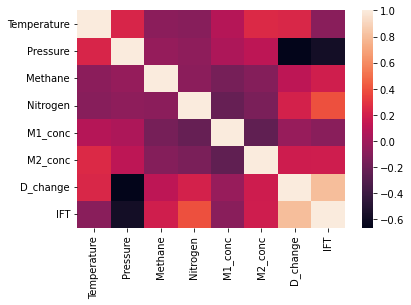

In [3]:
sns.heatmap(df.corr())

# Splitting data and working on features


In [4]:
X= df. drop(['IFT','Phase'],axis=1)

In [5]:
y=df.IFT.astype(float)

In [6]:
from sklearn.preprocessing import OneHotEncoder
One_hot=OneHotEncoder()
categorical=['Salttype']
X_categorical=One_hot.fit_transform(X[categorical])

In [7]:
x_cat=pd.DataFrame(X_categorical.toarray(),columns= One_hot.get_feature_names(categorical))

C:\Users\Paa Kwasi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [8]:
x_cat

,Salttype_CaCl,Salttype_MgCl,Salttype_Na2SO4,Salttype_NaCl,Salttype_NaClCaCl,Salttype_NaClKCl,Salttype_Water
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1761,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1762,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1763,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1764,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
X.index=x_cat.index

In [10]:
X=pd.concat([X,x_cat],axis=1)

In [11]:
X

,Temperature,Pressure,Methane,Nitrogen,M1_conc,M2_conc,Salttype,D_change,Salttype_CaCl,Salttype_MgCl,Salttype_Na2SO4,Salttype_NaCl,Salttype_NaClCaCl,Salttype_NaClKCl,Salttype_Water
0,27.00,5.070,0.0,0.0,0.0,0.045,CaCl,0.88170,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,27.00,6.030,0.0,0.0,0.0,0.045,CaCl,0.82990,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27.00,7.020,0.0,0.0,0.0,0.045,CaCl,0.30280,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27.00,8.270,0.0,0.0,0.0,0.045,CaCl,0.25460,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27.00,11.050,0.0,0.0,0.0,0.045,CaCl,0.19770,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1761,99.95,10.978,0.0,0.0,4.9,0.000,NaClKCl,0.91568,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1762,99.95,11.962,0.0,0.0,4.9,0.000,NaClKCl,0.88873,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1763,99.95,12.974,0.0,0.0,4.9,0.000,NaClKCl,0.85951,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1764,99.95,13.964,0.0,0.0,4.9,0.000,NaClKCl,0.83316,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
X=X.drop(["Salttype"],axis=1)

In [13]:
y.index=X.index

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=5,train_size=.7)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [16]:
xgbr=XGBRegressor(reg_lambda=0.1)

In [17]:
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=0.1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [18]:
xgbr.score(X_train,y_train)

0.9996993248960018

In [19]:
xgbr.score(X_test,y_test)

0.9860691443935676

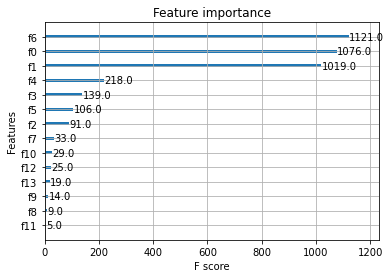

In [20]:
import xgboost as xgb
xgb.plot_importance(xgbr)
plt.show()

In [21]:
importances = xgbr.get_booster().get_score(importance_type='weight')

In [22]:
importances

{'f0': 1076.0,
 'f1': 1019.0,
 'f2': 91.0,
 'f3': 139.0,
 'f4': 218.0,
 'f5': 106.0,
 'f6': 1121.0,
 'f7': 33.0,
 'f8': 9.0,
 'f9': 14.0,
 'f10': 29.0,
 'f11': 5.0,
 'f12': 25.0,
 'f13': 19.0}

# Checking the Mean squared and absolute errors of the XGBR 

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_abs=mean_absolute_error(y_test,xgbr.predict(X_test))
mean_squared=mean_squared_error(y_test,xgbr.predict(X_test))

mean_abs_t=mean_absolute_error(y_train,xgbr.predict(X_train))
mean_squared_t=mean_squared_error(y_train,xgbr.predict(X_train))

In [24]:
mean_abs, mean_squared, mean_abs_t, mean_squared_t

(0.9947922623832273,
 1.9256163944691997,
 0.14903175847815853,
 0.04046742484090612)

In [25]:
df=pd.DataFrame(y_test) 
df

,IFT
1611,29.52
949,33.50
680,30.50
141,25.00
1620,34.50
...,...
8,27.86
218,56.70
366,43.02
963,62.10


In [26]:
d2=pd.DataFrame(xgbr.predict(X_test), columns=['IFT_pred'])
d2.index=df.index

In [27]:
df=pd.concat([df,d2],axis=1)

In [28]:
#df.to_csv("XGBRegressor actual values vs Predicted values without Phase.csv")

# Neural Network

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [94]:
model=Sequential([
    Dense(50, 'relu'),
    Dense(100,'relu',kernel_regularizer=l2(0.1)),
    Dense(200,'relu',kernel_regularizer=l2(0.1)),
    Dense(300,'relu'),
    Dense(400,'relu'),
    Dense(1,'linear')
])

model.compile(optimizer=Adam(0.009),loss='mse', metrics=['mse','mean_absolute_error'])

In [95]:
class Mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs.get('loss')<1.5:
            self.model.stop_training=True

In [96]:
history=model.fit(X_train,y_train,epochs=5000, callbacks=Mycallback())

Epoch 1/5000
39/39 [==============================] - 1s 7ms/step - loss: 380.9209 - mse: 366.6938 - mean_absolute_error: 14.0665
Epoch 2/5000
39/39 [==============================] - 0s 6ms/step - loss: 48.6306 - mse: 36.4908 - mean_absolute_error: 4.5835
Epoch 3/5000
39/39 [==============================] - 0s 5ms/step - loss: 37.4836 - mse: 26.5878 - mean_absolute_error: 3.8506
Epoch 4/5000
39/39 [==============================] - 0s 5ms/step - loss: 28.6775 - mse: 18.7908 - mean_absolute_error: 3.2858
Epoch 5/5000
39/39 [==============================] - 0s 5ms/step - loss: 23.8510 - mse: 14.8141 - mean_absolute_error: 2.8777
Epoch 6/5000
39/39 [==============================] - 0s 4ms/step - loss: 19.5551 - mse: 11.2217 - mean_absolute_error: 2.4880
Epoch 7/5000
39/39 [==============================] - 0s 5ms/step - loss: 19.4288 - mse: 11.7430 - mean_absolute_error: 2.5281
Epoch 8/5000
39/39 [==============================] - 0s 6ms/step - loss: 19.5469 - mse: 12.4715 - mean_abso

39/39 [==============================] - 0s 7ms/step - loss: 8.6558 - mse: 7.6696 - mean_absolute_error: 2.0793
Epoch 66/5000
39/39 [==============================] - 0s 7ms/step - loss: 7.1426 - mse: 6.1573 - mean_absolute_error: 1.8009
Epoch 67/5000
39/39 [==============================] - 0s 9ms/step - loss: 5.0995 - mse: 4.1201 - mean_absolute_error: 1.4990
Epoch 68/5000
39/39 [==============================] - 0s 6ms/step - loss: 5.5993 - mse: 4.6387 - mean_absolute_error: 1.5970
Epoch 69/5000
39/39 [==============================] - 0s 4ms/step - loss: 7.8150 - mse: 6.8651 - mean_absolute_error: 1.9925
Epoch 70/5000
39/39 [==============================] - 0s 5ms/step - loss: 6.4983 - mse: 5.5602 - mean_absolute_error: 1.7582
Epoch 71/5000
39/39 [==============================] - 0s 4ms/step - loss: 5.3541 - mse: 4.4406 - mean_absolute_error: 1.5479
Epoch 72/5000
39/39 [==============================] - 0s 5ms/step - loss: 5.6949 - mse: 4.7707 - mean_absolute_error: 1.6059
Epoch 

39/39 [==============================] - 0s 12ms/step - loss: 4.0428 - mse: 3.3382 - mean_absolute_error: 1.3359
Epoch 130/5000
39/39 [==============================] - 0s 10ms/step - loss: 4.7164 - mse: 4.0096 - mean_absolute_error: 1.5149
Epoch 131/5000
39/39 [==============================] - 0s 8ms/step - loss: 6.6244 - mse: 5.9265 - mean_absolute_error: 1.8530
Epoch 132/5000
39/39 [==============================] - 0s 5ms/step - loss: 4.5670 - mse: 3.8700 - mean_absolute_error: 1.4398
Epoch 133/5000
39/39 [==============================] - 0s 5ms/step - loss: 4.2702 - mse: 3.5697 - mean_absolute_error: 1.3665
Epoch 134/5000
39/39 [==============================] - 0s 5ms/step - loss: 4.4911 - mse: 3.8027 - mean_absolute_error: 1.4289
Epoch 135/5000
39/39 [==============================] - 0s 5ms/step - loss: 4.9071 - mse: 4.2243 - mean_absolute_error: 1.5319
Epoch 136/5000
39/39 [==============================] - 0s 4ms/step - loss: 4.5677 - mse: 3.8775 - mean_absolute_error: 1.41

39/39 [==============================] - 0s 4ms/step - loss: 4.6064 - mse: 4.0137 - mean_absolute_error: 1.4638
Epoch 194/5000
39/39 [==============================] - 0s 4ms/step - loss: 4.2145 - mse: 3.6258 - mean_absolute_error: 1.4171
Epoch 195/5000
39/39 [==============================] - 0s 3ms/step - loss: 5.1795 - mse: 4.6011 - mean_absolute_error: 1.6107
Epoch 196/5000
39/39 [==============================] - 0s 3ms/step - loss: 4.0017 - mse: 3.4285 - mean_absolute_error: 1.3681
Epoch 197/5000
39/39 [==============================] - 0s 3ms/step - loss: 5.1950 - mse: 4.6000 - mean_absolute_error: 1.5940
Epoch 198/5000
39/39 [==============================] - 0s 3ms/step - loss: 4.0052 - mse: 3.4023 - mean_absolute_error: 1.3468
Epoch 199/5000
39/39 [==============================] - 0s 3ms/step - loss: 3.7189 - mse: 3.1294 - mean_absolute_error: 1.2769
Epoch 200/5000
39/39 [==============================] - 0s 3ms/step - loss: 3.7526 - mse: 3.1628 - mean_absolute_error: 1.2963

39/39 [==============================] - 0s 6ms/step - loss: 2.9181 - mse: 2.3945 - mean_absolute_error: 1.1080
Epoch 258/5000
39/39 [==============================] - 0s 6ms/step - loss: 3.1327 - mse: 2.6068 - mean_absolute_error: 1.1736
Epoch 259/5000
39/39 [==============================] - 0s 5ms/step - loss: 5.8676 - mse: 5.3562 - mean_absolute_error: 1.7275
Epoch 260/5000
39/39 [==============================] - 0s 6ms/step - loss: 5.1351 - mse: 4.6379 - mean_absolute_error: 1.5956
Epoch 261/5000
39/39 [==============================] - 0s 6ms/step - loss: 3.6365 - mse: 3.1338 - mean_absolute_error: 1.2774
Epoch 262/5000
39/39 [==============================] - 0s 8ms/step - loss: 3.0635 - mse: 2.5608 - mean_absolute_error: 1.1488
Epoch 263/5000
39/39 [==============================] - 0s 7ms/step - loss: 3.1174 - mse: 2.6122 - mean_absolute_error: 1.1621
Epoch 264/5000
39/39 [==============================] - 0s 8ms/step - loss: 2.9006 - mse: 2.3931 - mean_absolute_error: 1.1476

39/39 [==============================] - 0s 4ms/step - loss: 3.3060 - mse: 2.8568 - mean_absolute_error: 1.2349
Epoch 322/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.1915 - mse: 2.7473 - mean_absolute_error: 1.2084
Epoch 323/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.1718 - mse: 2.7218 - mean_absolute_error: 1.1954
Epoch 324/5000
39/39 [==============================] - 0s 4ms/step - loss: 4.3182 - mse: 3.8652 - mean_absolute_error: 1.4508
Epoch 325/5000
39/39 [==============================] - 0s 5ms/step - loss: 4.6109 - mse: 4.1575 - mean_absolute_error: 1.5070
Epoch 326/5000
39/39 [==============================] - 0s 5ms/step - loss: 3.0733 - mse: 2.6158 - mean_absolute_error: 1.1808
Epoch 327/5000
39/39 [==============================] - 0s 5ms/step - loss: 3.0256 - mse: 2.5751 - mean_absolute_error: 1.1789
Epoch 328/5000
39/39 [==============================] - 0s 5ms/step - loss: 3.1616 - mse: 2.7075 - mean_absolute_error: 1.1857

39/39 [==============================] - 0s 6ms/step - loss: 3.2176 - mse: 2.7606 - mean_absolute_error: 1.1894
Epoch 386/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.1499 - mse: 2.6889 - mean_absolute_error: 1.1707
Epoch 387/5000
39/39 [==============================] - 0s 4ms/step - loss: 4.1316 - mse: 3.6755 - mean_absolute_error: 1.4254
Epoch 388/5000
39/39 [==============================] - 0s 4ms/step - loss: 4.4332 - mse: 3.9817 - mean_absolute_error: 1.5106
Epoch 389/5000
39/39 [==============================] - 0s 5ms/step - loss: 4.3276 - mse: 3.8720 - mean_absolute_error: 1.4566
Epoch 390/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.0163 - mse: 2.5566 - mean_absolute_error: 1.1424
Epoch 391/5000
39/39 [==============================] - 0s 5ms/step - loss: 3.1639 - mse: 2.7093 - mean_absolute_error: 1.1987
Epoch 392/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.5293 - mse: 3.0838 - mean_absolute_error: 1.2975

39/39 [==============================] - 0s 4ms/step - loss: 3.1599 - mse: 2.7371 - mean_absolute_error: 1.2134
Epoch 450/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.0394 - mse: 2.6235 - mean_absolute_error: 1.1664
Epoch 451/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.5388 - mse: 3.1307 - mean_absolute_error: 1.3045
Epoch 452/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.8220 - mse: 2.4071 - mean_absolute_error: 1.1011
Epoch 453/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.6067 - mse: 3.1872 - mean_absolute_error: 1.3266
Epoch 454/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.8450 - mse: 3.4268 - mean_absolute_error: 1.3495
Epoch 455/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.1502 - mse: 2.7310 - mean_absolute_error: 1.2185
Epoch 456/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.7600 - mse: 2.3392 - mean_absolute_error: 1.0743

39/39 [==============================] - 0s 4ms/step - loss: 2.9126 - mse: 2.4845 - mean_absolute_error: 1.1543
Epoch 514/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.0194 - mse: 2.5987 - mean_absolute_error: 1.1962
Epoch 515/5000
39/39 [==============================] - 0s 5ms/step - loss: 3.0290 - mse: 2.6137 - mean_absolute_error: 1.1773
Epoch 516/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.9095 - mse: 2.4933 - mean_absolute_error: 1.1555
Epoch 517/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.8653 - mse: 2.4400 - mean_absolute_error: 1.1255
Epoch 518/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.7277 - mse: 2.3025 - mean_absolute_error: 1.0894
Epoch 519/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.7523 - mse: 2.3268 - mean_absolute_error: 1.0746
Epoch 520/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.0973 - mse: 2.6753 - mean_absolute_error: 1.1681

39/39 [==============================] - 0s 5ms/step - loss: 3.2818 - mse: 2.8670 - mean_absolute_error: 1.2385
Epoch 578/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.8982 - mse: 2.4827 - mean_absolute_error: 1.1403
Epoch 579/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.6746 - mse: 2.2633 - mean_absolute_error: 1.0906
Epoch 580/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.5817 - mse: 2.1662 - mean_absolute_error: 1.0350
Epoch 581/5000
39/39 [==============================] - 0s 5ms/step - loss: 3.1744 - mse: 2.7565 - mean_absolute_error: 1.1880
Epoch 582/5000
39/39 [==============================] - 0s 5ms/step - loss: 3.5321 - mse: 3.1190 - mean_absolute_error: 1.3119
Epoch 583/5000
39/39 [==============================] - 0s 5ms/step - loss: 4.1399 - mse: 3.7293 - mean_absolute_error: 1.4562
Epoch 584/5000
39/39 [==============================] - 0s 5ms/step - loss: 4.0506 - mse: 3.6392 - mean_absolute_error: 1.4407

39/39 [==============================] - 0s 4ms/step - loss: 3.0347 - mse: 2.6203 - mean_absolute_error: 1.1717
Epoch 642/5000
39/39 [==============================] - 0s 5ms/step - loss: 3.1217 - mse: 2.7171 - mean_absolute_error: 1.2010
Epoch 643/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6719 - mse: 2.2611 - mean_absolute_error: 1.1048
Epoch 644/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3799 - mse: 1.9698 - mean_absolute_error: 0.9804
Epoch 645/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6939 - mse: 2.2904 - mean_absolute_error: 1.0850
Epoch 646/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5140 - mse: 2.1139 - mean_absolute_error: 1.0383
Epoch 647/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5548 - mse: 2.1470 - mean_absolute_error: 1.0625
Epoch 648/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6375 - mse: 2.2294 - mean_absolute_error: 1.0558

39/39 [==============================] - 0s 7ms/step - loss: 2.4612 - mse: 2.0615 - mean_absolute_error: 1.0204
Epoch 706/5000
39/39 [==============================] - 0s 5ms/step - loss: 3.4624 - mse: 3.0638 - mean_absolute_error: 1.2786
Epoch 707/5000
39/39 [==============================] - 0s 5ms/step - loss: 4.1154 - mse: 3.7062 - mean_absolute_error: 1.4331
Epoch 708/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.8943 - mse: 3.4774 - mean_absolute_error: 1.3732
Epoch 709/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4446 - mse: 2.0269 - mean_absolute_error: 1.0081
Epoch 710/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4582 - mse: 2.0425 - mean_absolute_error: 1.0284
Epoch 711/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5530 - mse: 2.1362 - mean_absolute_error: 1.0374
Epoch 712/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.8311 - mse: 2.4181 - mean_absolute_error: 1.1424

39/39 [==============================] - 0s 6ms/step - loss: 2.7951 - mse: 2.3955 - mean_absolute_error: 1.1360
Epoch 770/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.5080 - mse: 2.1055 - mean_absolute_error: 1.0389
Epoch 771/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3218 - mse: 1.9239 - mean_absolute_error: 0.9915
Epoch 772/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5957 - mse: 2.1990 - mean_absolute_error: 1.0501
Epoch 773/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.8106 - mse: 2.4171 - mean_absolute_error: 1.1113
Epoch 774/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6255 - mse: 2.2338 - mean_absolute_error: 1.0614
Epoch 775/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.2724 - mse: 1.8839 - mean_absolute_error: 0.9743
Epoch 776/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.8912 - mse: 2.5005 - mean_absolute_error: 1.1523

39/39 [==============================] - 0s 4ms/step - loss: 2.7740 - mse: 2.3858 - mean_absolute_error: 1.1199
Epoch 834/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3244 - mse: 1.9240 - mean_absolute_error: 0.9971
Epoch 835/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6707 - mse: 2.2771 - mean_absolute_error: 1.0942
Epoch 836/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.5753 - mse: 2.1834 - mean_absolute_error: 1.0670
Epoch 837/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4216 - mse: 2.0330 - mean_absolute_error: 1.0239
Epoch 838/5000
39/39 [==============================] - 0s 5ms/step - loss: 3.0205 - mse: 2.6297 - mean_absolute_error: 1.1938
Epoch 839/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.6564 - mse: 2.2657 - mean_absolute_error: 1.0938
Epoch 840/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.9572 - mse: 2.5648 - mean_absolute_error: 1.1866

39/39 [==============================] - 0s 5ms/step - loss: 2.8191 - mse: 2.4320 - mean_absolute_error: 1.1277
Epoch 898/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.3940 - mse: 2.0118 - mean_absolute_error: 1.0171
Epoch 899/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.8699 - mse: 2.4907 - mean_absolute_error: 1.1453
Epoch 900/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.9272 - mse: 2.5367 - mean_absolute_error: 1.1598
Epoch 901/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.8722 - mse: 2.4856 - mean_absolute_error: 1.1690
Epoch 902/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.7734 - mse: 2.3827 - mean_absolute_error: 1.1272
Epoch 903/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.4615 - mse: 2.0718 - mean_absolute_error: 1.0243
Epoch 904/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.6701 - mse: 2.2790 - mean_absolute_error: 1.0750

39/39 [==============================] - 0s 10ms/step - loss: 2.3409 - mse: 1.9631 - mean_absolute_error: 0.9790
Epoch 962/5000
39/39 [==============================] - 0s 10ms/step - loss: 2.1911 - mse: 1.8133 - mean_absolute_error: 0.9460
Epoch 963/5000
39/39 [==============================] - 0s 9ms/step - loss: 2.3375 - mse: 1.9575 - mean_absolute_error: 0.9864
Epoch 964/5000
39/39 [==============================] - 0s 8ms/step - loss: 4.0391 - mse: 3.6588 - mean_absolute_error: 1.3914
Epoch 965/5000
39/39 [==============================] - 0s 10ms/step - loss: 2.3158 - mse: 1.9263 - mean_absolute_error: 0.9771
Epoch 966/5000
39/39 [==============================] - 0s 10ms/step - loss: 2.2115 - mse: 1.8229 - mean_absolute_error: 0.9468
Epoch 967/5000
39/39 [==============================] - 0s 12ms/step - loss: 2.3901 - mse: 2.0072 - mean_absolute_error: 1.0176
Epoch 968/5000
39/39 [==============================] - 0s 9ms/step - loss: 2.7115 - mse: 2.3316 - mean_absolute_error: 1

39/39 [==============================] - 0s 5ms/step - loss: 2.3383 - mse: 1.9397 - mean_absolute_error: 0.9830
Epoch 1026/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.3410 - mse: 1.9431 - mean_absolute_error: 0.9701
Epoch 1027/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.6853 - mse: 2.2894 - mean_absolute_error: 1.1062
Epoch 1028/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.8808 - mse: 2.4826 - mean_absolute_error: 1.1502
Epoch 1029/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.4292 - mse: 2.0354 - mean_absolute_error: 1.0226
Epoch 1030/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.2889 - mse: 1.8970 - mean_absolute_error: 0.9629
Epoch 1031/5000
39/39 [==============================] - 0s 5ms/step - loss: 3.4447 - mse: 3.0498 - mean_absolute_error: 1.2902
Epoch 1032/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.8230 - mse: 2.4263 - mean_absolute_error:

39/39 [==============================] - 0s 8ms/step - loss: 2.1161 - mse: 1.7243 - mean_absolute_error: 0.9185
Epoch 1090/5000
39/39 [==============================] - 0s 8ms/step - loss: 2.3974 - mse: 2.0142 - mean_absolute_error: 1.0079
Epoch 1091/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.5171 - mse: 2.1410 - mean_absolute_error: 1.0596
Epoch 1092/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.1587 - mse: 1.7788 - mean_absolute_error: 0.9189
Epoch 1093/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.4464 - mse: 2.0690 - mean_absolute_error: 1.0351
Epoch 1094/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.2994 - mse: 1.9267 - mean_absolute_error: 0.9837
Epoch 1095/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.5077 - mse: 2.1270 - mean_absolute_error: 1.0478
Epoch 1096/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.5135 - mse: 2.1311 - mean_absolute_error:

39/39 [==============================] - 0s 7ms/step - loss: 5.1832 - mse: 4.8076 - mean_absolute_error: 1.6474
Epoch 1154/5000
39/39 [==============================] - 0s 9ms/step - loss: 2.7435 - mse: 2.3539 - mean_absolute_error: 1.1255
Epoch 1155/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.1914 - mse: 1.7988 - mean_absolute_error: 0.9205
Epoch 1156/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.2585 - mse: 1.8704 - mean_absolute_error: 0.9690
Epoch 1157/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.5325 - mse: 2.1476 - mean_absolute_error: 1.0654
Epoch 1158/5000
39/39 [==============================] - 0s 8ms/step - loss: 2.5844 - mse: 2.1956 - mean_absolute_error: 1.0780
Epoch 1159/5000
39/39 [==============================] - 0s 10ms/step - loss: 3.3488 - mse: 2.9548 - mean_absolute_error: 1.2666
Epoch 1160/5000
39/39 [==============================] - 0s 6ms/step - loss: 3.1774 - mse: 2.7853 - mean_absolute_error

39/39 [==============================] - 0s 5ms/step - loss: 2.4241 - mse: 2.0527 - mean_absolute_error: 1.0221
Epoch 1218/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.3998 - mse: 2.0263 - mean_absolute_error: 1.0312
Epoch 1219/5000
39/39 [==============================] - 0s 5ms/step - loss: 3.2654 - mse: 2.8904 - mean_absolute_error: 1.2464
Epoch 1220/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.2040 - mse: 1.8191 - mean_absolute_error: 0.9538
Epoch 1221/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.3374 - mse: 1.9584 - mean_absolute_error: 0.9875
Epoch 1222/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.7827 - mse: 2.4128 - mean_absolute_error: 1.1215
Epoch 1223/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.5323 - mse: 2.1546 - mean_absolute_error: 1.0609
Epoch 1224/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.2376 - mse: 1.8568 - mean_absolute_error:

39/39 [==============================] - 0s 5ms/step - loss: 2.8369 - mse: 2.4619 - mean_absolute_error: 1.1517
Epoch 1282/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.4744 - mse: 2.0943 - mean_absolute_error: 1.0372
Epoch 1283/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.4456 - mse: 2.0673 - mean_absolute_error: 1.0353
Epoch 1284/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.3275 - mse: 1.9562 - mean_absolute_error: 1.0144
Epoch 1285/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.4102 - mse: 2.0373 - mean_absolute_error: 1.0151
Epoch 1286/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4354 - mse: 2.0580 - mean_absolute_error: 1.0309
Epoch 1287/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.1266 - mse: 1.7498 - mean_absolute_error: 0.9337
Epoch 1288/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.9689 - mse: 2.5911 - mean_absolute_error:

39/39 [==============================] - 0s 5ms/step - loss: 2.5756 - mse: 2.2215 - mean_absolute_error: 1.0795
Epoch 1346/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.5836 - mse: 2.2318 - mean_absolute_error: 1.0703
Epoch 1347/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.5181 - mse: 3.1649 - mean_absolute_error: 1.3492
Epoch 1348/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.4646 - mse: 2.0967 - mean_absolute_error: 1.0474
Epoch 1349/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.4238 - mse: 2.0509 - mean_absolute_error: 1.0138
Epoch 1350/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.1452 - mse: 1.7747 - mean_absolute_error: 0.9322
Epoch 1351/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.1277 - mse: 1.7585 - mean_absolute_error: 0.9259
Epoch 1352/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.8444 - mse: 2.4755 - mean_absolute_error:

39/39 [==============================] - 0s 7ms/step - loss: 3.2112 - mse: 2.8375 - mean_absolute_error: 1.1975
Epoch 1410/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.2002 - mse: 1.8275 - mean_absolute_error: 0.9669
Epoch 1411/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.5170 - mse: 2.1482 - mean_absolute_error: 1.0438
Epoch 1412/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.1513 - mse: 1.7856 - mean_absolute_error: 0.9477
Epoch 1413/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.2114 - mse: 1.8415 - mean_absolute_error: 0.9480
Epoch 1414/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.5579 - mse: 2.1955 - mean_absolute_error: 1.0728
Epoch 1415/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.4852 - mse: 2.1148 - mean_absolute_error: 1.0406
Epoch 1416/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.3244 - mse: 1.9572 - mean_absolute_error:

39/39 [==============================] - 0s 7ms/step - loss: 2.2365 - mse: 1.8732 - mean_absolute_error: 0.9508
Epoch 1474/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.5590 - mse: 2.1960 - mean_absolute_error: 1.0582
Epoch 1475/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.5208 - mse: 2.1609 - mean_absolute_error: 1.0714
Epoch 1476/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.2425 - mse: 1.8785 - mean_absolute_error: 0.9695
Epoch 1477/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.4663 - mse: 2.1015 - mean_absolute_error: 1.0137
Epoch 1478/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.5513 - mse: 2.1852 - mean_absolute_error: 1.0596
Epoch 1479/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.4148 - mse: 2.0494 - mean_absolute_error: 1.0047
Epoch 1480/5000
39/39 [==============================] - 0s 7ms/step - loss: 3.4020 - mse: 3.0283 - mean_absolute_error:

39/39 [==============================] - 0s 7ms/step - loss: 2.1601 - mse: 1.8035 - mean_absolute_error: 0.9409
Epoch 1538/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.1986 - mse: 1.8420 - mean_absolute_error: 0.9514
Epoch 1539/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.2882 - mse: 1.9265 - mean_absolute_error: 0.9961
Epoch 1540/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.5631 - mse: 2.2081 - mean_absolute_error: 1.0702
Epoch 1541/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.8243 - mse: 2.4598 - mean_absolute_error: 1.1339
Epoch 1542/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.5803 - mse: 2.2135 - mean_absolute_error: 1.0651
Epoch 1543/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.2212 - mse: 1.8506 - mean_absolute_error: 0.9761
Epoch 1544/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.0878 - mse: 1.7184 - mean_absolute_error:

39/39 [==============================] - 0s 7ms/step - loss: 2.5632 - mse: 2.1782 - mean_absolute_error: 1.0787
Epoch 1602/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.2043 - mse: 1.8164 - mean_absolute_error: 0.9531
Epoch 1603/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.0980 - mse: 1.7119 - mean_absolute_error: 0.9250
Epoch 1604/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.1149 - mse: 1.7303 - mean_absolute_error: 0.9256
Epoch 1605/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.9953 - mse: 1.6126 - mean_absolute_error: 0.8896
Epoch 1606/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.1488 - mse: 1.7760 - mean_absolute_error: 0.9510
Epoch 1607/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.0533 - mse: 1.6801 - mean_absolute_error: 0.8810
Epoch 1608/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.0971 - mse: 1.7286 - mean_absolute_error:

39/39 [==============================] - 0s 7ms/step - loss: 2.7205 - mse: 2.3628 - mean_absolute_error: 1.1038
Epoch 1666/5000
39/39 [==============================] - 0s 7ms/step - loss: 3.1585 - mse: 2.8026 - mean_absolute_error: 1.2154
Epoch 1667/5000
39/39 [==============================] - 0s 8ms/step - loss: 2.4060 - mse: 2.0373 - mean_absolute_error: 1.0166
Epoch 1668/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.0193 - mse: 1.6526 - mean_absolute_error: 0.9051
Epoch 1669/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.2717 - mse: 1.9075 - mean_absolute_error: 0.9632
Epoch 1670/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.0038 - mse: 1.6365 - mean_absolute_error: 0.8795
Epoch 1671/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.1314 - mse: 1.7650 - mean_absolute_error: 0.9368
Epoch 1672/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.0881 - mse: 1.7250 - mean_absolute_error:

39/39 [==============================] - 0s 7ms/step - loss: 2.1503 - mse: 1.7904 - mean_absolute_error: 0.9360
Epoch 1730/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.3918 - mse: 2.0354 - mean_absolute_error: 1.0335
Epoch 1731/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.0085 - mse: 1.6535 - mean_absolute_error: 0.8895
Epoch 1732/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.2061 - mse: 1.8550 - mean_absolute_error: 0.9788
Epoch 1733/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.0964 - mse: 1.7397 - mean_absolute_error: 0.9259
Epoch 1734/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.0106 - mse: 1.6601 - mean_absolute_error: 0.8969
Epoch 1735/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.3315 - mse: 1.9833 - mean_absolute_error: 0.9954
Epoch 1736/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.1565 - mse: 1.8110 - mean_absolute_error:

39/39 [==============================] - 0s 6ms/step - loss: 2.6418 - mse: 2.2940 - mean_absolute_error: 1.1008
Epoch 1794/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.3643 - mse: 2.0128 - mean_absolute_error: 1.0265
Epoch 1795/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.6638 - mse: 2.3072 - mean_absolute_error: 1.0935
Epoch 1796/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.4440 - mse: 2.0841 - mean_absolute_error: 1.0312
Epoch 1797/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.1360 - mse: 1.7807 - mean_absolute_error: 0.9616
Epoch 1798/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.9771 - mse: 1.6263 - mean_absolute_error: 0.8739
Epoch 1799/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.1836 - mse: 1.8298 - mean_absolute_error: 0.9667
Epoch 1800/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.5910 - mse: 2.2388 - mean_absolute_error:

39/39 [==============================] - 0s 7ms/step - loss: 2.2772 - mse: 1.9176 - mean_absolute_error: 0.9975
Epoch 1858/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.0825 - mse: 1.7274 - mean_absolute_error: 0.9299
Epoch 1859/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.6267 - mse: 2.2725 - mean_absolute_error: 1.0596
Epoch 1860/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.9975 - mse: 1.6375 - mean_absolute_error: 0.8903
Epoch 1861/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.1824 - mse: 1.8274 - mean_absolute_error: 0.9483
Epoch 1862/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.3224 - mse: 1.9708 - mean_absolute_error: 1.0069
Epoch 1863/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.2264 - mse: 1.8751 - mean_absolute_error: 0.9417
Epoch 1864/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.4352 - mse: 2.0801 - mean_absolute_error:

39/39 [==============================] - 0s 7ms/step - loss: 3.5179 - mse: 3.1584 - mean_absolute_error: 1.3261
Epoch 1922/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.5606 - mse: 2.1831 - mean_absolute_error: 1.0726
Epoch 1923/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.9665 - mse: 1.6017 - mean_absolute_error: 0.8710
Epoch 1924/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.0350 - mse: 1.6716 - mean_absolute_error: 0.8840
Epoch 1925/5000
39/39 [==============================] - 0s 7ms/step - loss: 1.9637 - mse: 1.6023 - mean_absolute_error: 0.8885
Epoch 1926/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.2039 - mse: 1.8491 - mean_absolute_error: 0.9613
Epoch 1927/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.9727 - mse: 1.6159 - mean_absolute_error: 0.8730
Epoch 1928/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.6724 - mse: 2.3196 - mean_absolute_error:

39/39 [==============================] - 0s 8ms/step - loss: 2.3208 - mse: 1.9755 - mean_absolute_error: 0.9937
Epoch 1986/5000
39/39 [==============================] - 0s 8ms/step - loss: 2.1903 - mse: 1.8452 - mean_absolute_error: 0.9498
Epoch 1987/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.5597 - mse: 2.2007 - mean_absolute_error: 1.0442
Epoch 1988/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.0247 - mse: 1.6679 - mean_absolute_error: 0.9029
Epoch 1989/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.0973 - mse: 1.7436 - mean_absolute_error: 0.9278
Epoch 1990/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.9790 - mse: 1.6286 - mean_absolute_error: 0.8833
Epoch 1991/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.0027 - mse: 1.6532 - mean_absolute_error: 0.9054
Epoch 1992/5000
39/39 [==============================] - 0s 7ms/step - loss: 1.9377 - mse: 1.5906 - mean_absolute_error:

39/39 [==============================] - 0s 9ms/step - loss: 2.7326 - mse: 2.3700 - mean_absolute_error: 1.0910
Epoch 2050/5000
39/39 [==============================] - 0s 9ms/step - loss: 2.4826 - mse: 2.1124 - mean_absolute_error: 1.0453
Epoch 2051/5000
39/39 [==============================] - 0s 11ms/step - loss: 2.2824 - mse: 1.9136 - mean_absolute_error: 0.9820
Epoch 2052/5000
39/39 [==============================] - 0s 8ms/step - loss: 2.2598 - mse: 1.9032 - mean_absolute_error: 0.9749
Epoch 2053/5000
39/39 [==============================] - 0s 9ms/step - loss: 2.0474 - mse: 1.6925 - mean_absolute_error: 0.9034
Epoch 2054/5000
39/39 [==============================] - 0s 9ms/step - loss: 2.5046 - mse: 2.1463 - mean_absolute_error: 1.0263
Epoch 2055/5000
39/39 [==============================] - 0s 9ms/step - loss: 2.5017 - mse: 2.1351 - mean_absolute_error: 1.0619
Epoch 2056/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.9646 - mse: 1.6032 - mean_absolute_error

39/39 [==============================] - 0s 6ms/step - loss: 2.0745 - mse: 1.7345 - mean_absolute_error: 0.9295
Epoch 2114/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.0751 - mse: 1.7376 - mean_absolute_error: 0.9235
Epoch 2115/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.2056 - mse: 1.8680 - mean_absolute_error: 0.9728
Epoch 2116/5000
39/39 [==============================] - 0s 7ms/step - loss: 3.2287 - mse: 2.8797 - mean_absolute_error: 1.2718
Epoch 2117/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.7622 - mse: 2.4150 - mean_absolute_error: 1.1358
Epoch 2118/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.5031 - mse: 2.1500 - mean_absolute_error: 1.0426
Epoch 2119/5000
39/39 [==============================] - 0s 6ms/step - loss: 3.4194 - mse: 3.0649 - mean_absolute_error: 1.2735
Epoch 2120/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.3020 - mse: 1.9380 - mean_absolute_error:

39/39 [==============================] - 0s 6ms/step - loss: 2.0291 - mse: 1.6732 - mean_absolute_error: 0.9098
Epoch 2178/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.0589 - mse: 1.7058 - mean_absolute_error: 0.9102
Epoch 2179/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.0419 - mse: 1.6861 - mean_absolute_error: 0.8963
Epoch 2180/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.1405 - mse: 1.7866 - mean_absolute_error: 0.9298
Epoch 2181/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.9671 - mse: 1.6196 - mean_absolute_error: 0.8922
Epoch 2182/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.0943 - mse: 1.7458 - mean_absolute_error: 0.9279
Epoch 2183/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.3684 - mse: 2.0216 - mean_absolute_error: 1.0335
Epoch 2184/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.1614 - mse: 1.8130 - mean_absolute_error:

39/39 [==============================] - 0s 7ms/step - loss: 2.1281 - mse: 1.7753 - mean_absolute_error: 0.9353
Epoch 2242/5000
39/39 [==============================] - 0s 9ms/step - loss: 2.1104 - mse: 1.7593 - mean_absolute_error: 0.9323
Epoch 2243/5000
39/39 [==============================] - 0s 9ms/step - loss: 1.9555 - mse: 1.6063 - mean_absolute_error: 0.8741
Epoch 2244/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.0314 - mse: 1.6806 - mean_absolute_error: 0.8941
Epoch 2245/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.0755 - mse: 1.7275 - mean_absolute_error: 0.9183
Epoch 2246/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.1990 - mse: 1.8551 - mean_absolute_error: 0.9701
Epoch 2247/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.0509 - mse: 1.7052 - mean_absolute_error: 0.9129
Epoch 2248/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.0259 - mse: 1.6843 - mean_absolute_error:

39/39 [==============================] - 0s 6ms/step - loss: 2.1625 - mse: 1.8192 - mean_absolute_error: 0.9493
Epoch 2306/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.1759 - mse: 1.8295 - mean_absolute_error: 0.9606
Epoch 2307/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.6472 - mse: 2.3024 - mean_absolute_error: 1.0725
Epoch 2308/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.2035 - mse: 1.8504 - mean_absolute_error: 0.9572
Epoch 2309/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.6541 - mse: 2.3057 - mean_absolute_error: 1.0880
Epoch 2310/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.2078 - mse: 1.8523 - mean_absolute_error: 0.9594
Epoch 2311/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.9898 - mse: 1.6381 - mean_absolute_error: 0.9099
Epoch 2312/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.0776 - mse: 1.7256 - mean_absolute_error:

39/39 [==============================] - 0s 4ms/step - loss: 2.1103 - mse: 1.7630 - mean_absolute_error: 0.9371
Epoch 2370/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3698 - mse: 2.0235 - mean_absolute_error: 1.0113
Epoch 2371/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.0318 - mse: 1.6878 - mean_absolute_error: 0.9145
Epoch 2372/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.9651 - mse: 1.6196 - mean_absolute_error: 0.8737
Epoch 2373/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.9273 - mse: 1.5837 - mean_absolute_error: 0.8796
Epoch 2374/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.8508 - mse: 1.5104 - mean_absolute_error: 0.8542
Epoch 2375/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.9220 - mse: 3.5832 - mean_absolute_error: 1.3637
Epoch 2376/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.7813 - mse: 2.4285 - mean_absolute_error:

39/39 [==============================] - 0s 4ms/step - loss: 1.9897 - mse: 1.6421 - mean_absolute_error: 0.9001
Epoch 2434/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.0311 - mse: 1.6899 - mean_absolute_error: 0.8984
Epoch 2435/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.9649 - mse: 1.6191 - mean_absolute_error: 0.9070
Epoch 2436/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1719 - mse: 1.8267 - mean_absolute_error: 0.9570
Epoch 2437/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.0232 - mse: 1.6787 - mean_absolute_error: 0.9093
Epoch 2438/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.0797 - mse: 1.7386 - mean_absolute_error: 0.9219
Epoch 2439/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2730 - mse: 1.9308 - mean_absolute_error: 1.0030
Epoch 2440/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.2194 - mse: 1.8763 - mean_absolute_error:

39/39 [==============================] - 0s 4ms/step - loss: 1.8182 - mse: 1.4786 - mean_absolute_error: 0.8255
Epoch 2498/5000
39/39 [==============================] - 0s 3ms/step - loss: 2.0947 - mse: 1.7582 - mean_absolute_error: 0.9245
Epoch 2499/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9571 - mse: 1.6238 - mean_absolute_error: 0.8875
Epoch 2500/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9997 - mse: 1.6677 - mean_absolute_error: 0.8998
Epoch 2501/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9891 - mse: 1.6572 - mean_absolute_error: 0.8885
Epoch 2502/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3019 - mse: 1.9608 - mean_absolute_error: 1.0080
Epoch 2503/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9739 - mse: 1.6402 - mean_absolute_error: 0.8913
Epoch 2504/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.6334 - mse: 2.2970 - mean_absolute_error:

39/39 [==============================] - 0s 4ms/step - loss: 1.9755 - mse: 1.6250 - mean_absolute_error: 0.8829
Epoch 2562/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9288 - mse: 1.5829 - mean_absolute_error: 0.8866
Epoch 2563/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5276 - mse: 2.1861 - mean_absolute_error: 1.0756
Epoch 2564/5000
39/39 [==============================] - 0s 3ms/step - loss: 2.2135 - mse: 1.8669 - mean_absolute_error: 0.9769
Epoch 2565/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9281 - mse: 1.5859 - mean_absolute_error: 0.8636
Epoch 2566/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9895 - mse: 1.6479 - mean_absolute_error: 0.8922
Epoch 2567/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4271 - mse: 2.0912 - mean_absolute_error: 1.0403
Epoch 2568/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.8867 - mse: 2.5509 - mean_absolute_error:

39/39 [==============================] - 0s 4ms/step - loss: 2.1152 - mse: 1.7702 - mean_absolute_error: 0.9401
Epoch 2626/5000
39/39 [==============================] - 0s 3ms/step - loss: 2.1106 - mse: 1.7702 - mean_absolute_error: 0.9368
Epoch 2627/5000
39/39 [==============================] - 0s 3ms/step - loss: 2.2777 - mse: 1.9392 - mean_absolute_error: 0.9966
Epoch 2628/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1030 - mse: 1.7648 - mean_absolute_error: 0.9487
Epoch 2629/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.0184 - mse: 1.6778 - mean_absolute_error: 0.8987
Epoch 2630/5000
39/39 [==============================] - 0s 3ms/step - loss: 2.1129 - mse: 1.7730 - mean_absolute_error: 0.9425
Epoch 2631/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.0027 - mse: 1.6627 - mean_absolute_error: 0.8935
Epoch 2632/5000
39/39 [==============================] - 0s 3ms/step - loss: 1.9750 - mse: 1.6388 - mean_absolute_error:

39/39 [==============================] - 0s 4ms/step - loss: 1.9305 - mse: 1.5841 - mean_absolute_error: 0.8881
Epoch 2690/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.0037 - mse: 1.6571 - mean_absolute_error: 0.9045
Epoch 2691/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9297 - mse: 1.5890 - mean_absolute_error: 0.8878
Epoch 2692/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2725 - mse: 1.9322 - mean_absolute_error: 0.9920
Epoch 2693/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5618 - mse: 2.2109 - mean_absolute_error: 1.0537
Epoch 2694/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1543 - mse: 1.7994 - mean_absolute_error: 0.9333
Epoch 2695/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1816 - mse: 1.8277 - mean_absolute_error: 0.9585
Epoch 2696/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1021 - mse: 1.7534 - mean_absolute_error:

39/39 [==============================] - 0s 4ms/step - loss: 2.0443 - mse: 1.6992 - mean_absolute_error: 0.9030
Epoch 2754/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.0114 - mse: 1.6691 - mean_absolute_error: 0.9140
Epoch 2755/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.0011 - mse: 1.6594 - mean_absolute_error: 0.9066
Epoch 2756/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.0199 - mse: 1.6821 - mean_absolute_error: 0.9133
Epoch 2757/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1095 - mse: 1.7730 - mean_absolute_error: 0.9479
Epoch 2758/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4786 - mse: 2.1389 - mean_absolute_error: 1.0521
Epoch 2759/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.8788 - mse: 1.5351 - mean_absolute_error: 0.8539
Epoch 2760/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1730 - mse: 1.8348 - mean_absolute_error:

39/39 [==============================] - 0s 9ms/step - loss: 2.1653 - mse: 1.8181 - mean_absolute_error: 0.9580
Epoch 2818/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.3631 - mse: 2.0133 - mean_absolute_error: 1.0229
Epoch 2819/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1480 - mse: 1.7974 - mean_absolute_error: 0.9366
Epoch 2820/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9841 - mse: 1.6358 - mean_absolute_error: 0.9031
Epoch 2821/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2687 - mse: 1.9219 - mean_absolute_error: 0.9929
Epoch 2822/5000
39/39 [==============================] - 0s 3ms/step - loss: 1.9938 - mse: 1.6469 - mean_absolute_error: 0.8876
Epoch 2823/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1028 - mse: 1.7573 - mean_absolute_error: 0.9576
Epoch 2824/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.0449 - mse: 1.7047 - mean_absolute_error:

39/39 [==============================] - 0s 5ms/step - loss: 1.8899 - mse: 1.5557 - mean_absolute_error: 0.8706
Epoch 2882/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.9531 - mse: 1.6141 - mean_absolute_error: 0.8845
Epoch 2883/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.0166 - mse: 1.6823 - mean_absolute_error: 0.9063
Epoch 2884/5000
39/39 [==============================] - 0s 8ms/step - loss: 2.4582 - mse: 2.1203 - mean_absolute_error: 1.0319
Epoch 2885/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.5332 - mse: 2.2009 - mean_absolute_error: 1.0789
Epoch 2886/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.1034 - mse: 1.7686 - mean_absolute_error: 0.9354
Epoch 2887/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.9278 - mse: 1.5934 - mean_absolute_error: 0.8695
Epoch 2888/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.0769 - mse: 1.7431 - mean_absolute_error:

39/39 [==============================] - 0s 5ms/step - loss: 2.0623 - mse: 1.7245 - mean_absolute_error: 0.9333
Epoch 2946/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.0471 - mse: 1.7175 - mean_absolute_error: 0.9033
Epoch 2947/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.2605 - mse: 1.9256 - mean_absolute_error: 0.9935
Epoch 2948/5000
39/39 [==============================] - 0s 8ms/step - loss: 2.5082 - mse: 2.1695 - mean_absolute_error: 1.0885
Epoch 2949/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.9697 - mse: 1.6234 - mean_absolute_error: 0.8831
Epoch 2950/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9199 - mse: 1.5773 - mean_absolute_error: 0.8701
Epoch 2951/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.0710 - mse: 1.7338 - mean_absolute_error: 0.9244
Epoch 2952/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3182 - mse: 1.9821 - mean_absolute_error:

39/39 [==============================] - 0s 4ms/step - loss: 1.9903 - mse: 1.6362 - mean_absolute_error: 0.8850
Epoch 3010/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2074 - mse: 1.8549 - mean_absolute_error: 0.9425
Epoch 3011/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9938 - mse: 1.6404 - mean_absolute_error: 0.9089
Epoch 3012/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9897 - mse: 1.6359 - mean_absolute_error: 0.8994
Epoch 3013/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2627 - mse: 1.9099 - mean_absolute_error: 0.9842
Epoch 3014/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.0883 - mse: 1.7332 - mean_absolute_error: 0.9200
Epoch 3015/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.0856 - mse: 1.7344 - mean_absolute_error: 0.9479
Epoch 3016/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.0789 - mse: 1.7414 - mean_absolute_error:

39/39 [==============================] - 0s 7ms/step - loss: 2.8242 - mse: 2.4710 - mean_absolute_error: 1.1281
Epoch 3074/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.1662 - mse: 1.8194 - mean_absolute_error: 0.9486
Epoch 3075/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9510 - mse: 1.6034 - mean_absolute_error: 0.8771
Epoch 3076/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9921 - mse: 1.6399 - mean_absolute_error: 0.8912
Epoch 3077/5000
39/39 [==============================] - 0s 3ms/step - loss: 2.1852 - mse: 1.8367 - mean_absolute_error: 0.9800
Epoch 3078/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.8895 - mse: 1.5469 - mean_absolute_error: 0.8749
Epoch 3079/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.0503 - mse: 1.7102 - mean_absolute_error: 0.9138
Epoch 3080/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3922 - mse: 2.0558 - mean_absolute_error:

39/39 [==============================] - 0s 3ms/step - loss: 2.1005 - mse: 1.7588 - mean_absolute_error: 0.9150
Epoch 3138/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1228 - mse: 1.7778 - mean_absolute_error: 0.9359
Epoch 3139/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1967 - mse: 1.8474 - mean_absolute_error: 0.9722
Epoch 3140/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.8897 - mse: 1.5515 - mean_absolute_error: 0.8608
Epoch 3141/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1060 - mse: 1.7633 - mean_absolute_error: 0.9208
Epoch 3142/5000
39/39 [==============================] - 0s 3ms/step - loss: 2.0195 - mse: 1.6756 - mean_absolute_error: 0.9134
Epoch 3143/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.8692 - mse: 1.5252 - mean_absolute_error: 0.8617
Epoch 3144/5000
39/39 [==============================] - 0s 3ms/step - loss: 2.1924 - mse: 1.8523 - mean_absolute_error:

39/39 [==============================] - 0s 4ms/step - loss: 2.9756 - mse: 2.6407 - mean_absolute_error: 1.1652
Epoch 3202/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.0289 - mse: 2.6839 - mean_absolute_error: 1.2159
Epoch 3203/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9829 - mse: 1.6356 - mean_absolute_error: 0.9020
Epoch 3204/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9093 - mse: 1.5604 - mean_absolute_error: 0.8747
Epoch 3205/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2946 - mse: 1.9509 - mean_absolute_error: 0.9922
Epoch 3206/5000
39/39 [==============================] - 0s 3ms/step - loss: 1.9890 - mse: 1.6497 - mean_absolute_error: 0.8989
Epoch 3207/5000
39/39 [==============================] - 0s 3ms/step - loss: 2.1343 - mse: 1.7954 - mean_absolute_error: 0.9446
Epoch 3208/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.0066 - mse: 1.6667 - mean_absolute_error:

39/39 [==============================] - 0s 4ms/step - loss: 2.5767 - mse: 2.2325 - mean_absolute_error: 1.0528
Epoch 3266/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.0884 - mse: 1.7446 - mean_absolute_error: 0.9468
Epoch 3267/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9567 - mse: 1.6203 - mean_absolute_error: 0.8712
Epoch 3268/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.0898 - mse: 1.7535 - mean_absolute_error: 0.9375
Epoch 3269/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2282 - mse: 1.8884 - mean_absolute_error: 1.0005
Epoch 3270/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5210 - mse: 2.1842 - mean_absolute_error: 1.0621
Epoch 3271/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.5935 - mse: 2.2595 - mean_absolute_error: 1.0986
Epoch 3272/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.0279 - mse: 1.6800 - mean_absolute_error:

39/39 [==============================] - 0s 5ms/step - loss: 1.9140 - mse: 1.5844 - mean_absolute_error: 0.8683
Epoch 3330/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.0069 - mse: 1.6781 - mean_absolute_error: 0.8880
Epoch 3331/5000
39/39 [==============================] - 0s 8ms/step - loss: 2.0856 - mse: 1.7559 - mean_absolute_error: 0.9439
Epoch 3332/5000
39/39 [==============================] - 0s 7ms/step - loss: 1.9014 - mse: 1.5763 - mean_absolute_error: 0.8752
Epoch 3333/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.0308 - mse: 1.7062 - mean_absolute_error: 0.9182
Epoch 3334/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9151 - mse: 1.5900 - mean_absolute_error: 0.8790
Epoch 3335/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.0266 - mse: 1.7019 - mean_absolute_error: 0.9121
Epoch 3336/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2629 - mse: 1.9356 - mean_absolute_error:

39/39 [==============================] - 0s 4ms/step - loss: 2.2747 - mse: 1.9306 - mean_absolute_error: 0.9804
Epoch 3394/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1059 - mse: 1.7560 - mean_absolute_error: 0.9400
Epoch 3395/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.4913 - mse: 2.1467 - mean_absolute_error: 1.0687
Epoch 3396/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.1375 - mse: 1.7901 - mean_absolute_error: 0.9643
Epoch 3397/5000
39/39 [==============================] - 0s 9ms/step - loss: 1.8959 - mse: 1.5518 - mean_absolute_error: 0.8740
Epoch 3398/5000
39/39 [==============================] - 0s 10ms/step - loss: 1.8707 - mse: 1.5274 - mean_absolute_error: 0.8615
Epoch 3399/5000
39/39 [==============================] - 0s 7ms/step - loss: 1.9117 - mse: 1.5677 - mean_absolute_error: 0.8775
Epoch 3400/5000
39/39 [==============================] - 0s 7ms/step - loss: 1.9738 - mse: 1.6299 - mean_absolute_error

39/39 [==============================] - 0s 5ms/step - loss: 1.8372 - mse: 1.5058 - mean_absolute_error: 0.8620
Epoch 3458/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.3088 - mse: 1.9723 - mean_absolute_error: 0.9981
Epoch 3459/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.2491 - mse: 1.9124 - mean_absolute_error: 1.0065
Epoch 3460/5000
39/39 [==============================] - 0s 8ms/step - loss: 2.1866 - mse: 1.8499 - mean_absolute_error: 0.9830
Epoch 3461/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.0690 - mse: 1.7357 - mean_absolute_error: 0.9183
Epoch 3462/5000
39/39 [==============================] - 0s 8ms/step - loss: 2.0968 - mse: 1.7661 - mean_absolute_error: 0.9259
Epoch 3463/5000
39/39 [==============================] - 0s 7ms/step - loss: 1.9511 - mse: 1.6136 - mean_absolute_error: 0.9108
Epoch 3464/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.4580 - mse: 2.1256 - mean_absolute_error:

39/39 [==============================] - 0s 5ms/step - loss: 2.0254 - mse: 1.7007 - mean_absolute_error: 0.9125
Epoch 3522/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.8743 - mse: 1.5476 - mean_absolute_error: 0.8777
Epoch 3523/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.0165 - mse: 1.6953 - mean_absolute_error: 0.9168
Epoch 3524/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.1401 - mse: 1.8144 - mean_absolute_error: 0.9553
Epoch 3525/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.9783 - mse: 1.6536 - mean_absolute_error: 0.9088
Epoch 3526/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.8581 - mse: 1.5287 - mean_absolute_error: 0.8762
Epoch 3527/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.2026 - mse: 1.8806 - mean_absolute_error: 0.9749
Epoch 3528/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.2126 - mse: 1.8837 - mean_absolute_error:

39/39 [==============================] - 0s 5ms/step - loss: 2.0038 - mse: 1.6601 - mean_absolute_error: 0.9136
Epoch 3586/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.1035 - mse: 1.7591 - mean_absolute_error: 0.9546
Epoch 3587/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.3145 - mse: 1.9719 - mean_absolute_error: 0.9682
Epoch 3588/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.1715 - mse: 1.8197 - mean_absolute_error: 0.9645
Epoch 3589/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.8807 - mse: 1.5349 - mean_absolute_error: 0.8565
Epoch 3590/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1828 - mse: 1.8342 - mean_absolute_error: 0.9853
Epoch 3591/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.8866 - mse: 1.5425 - mean_absolute_error: 0.8616
Epoch 3592/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1197 - mse: 1.7762 - mean_absolute_error:

39/39 [==============================] - 0s 4ms/step - loss: 2.0535 - mse: 1.7078 - mean_absolute_error: 0.9394
Epoch 3650/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1223 - mse: 1.7734 - mean_absolute_error: 0.9373
Epoch 3651/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.0257 - mse: 1.6802 - mean_absolute_error: 0.9208
Epoch 3652/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.0836 - mse: 1.7345 - mean_absolute_error: 0.9415
Epoch 3653/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9543 - mse: 1.5995 - mean_absolute_error: 0.8754
Epoch 3654/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9278 - mse: 1.5867 - mean_absolute_error: 0.8834
Epoch 3655/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1580 - mse: 1.8163 - mean_absolute_error: 0.9552
Epoch 3656/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9793 - mse: 1.6374 - mean_absolute_error:

39/39 [==============================] - 0s 4ms/step - loss: 2.0778 - mse: 1.7449 - mean_absolute_error: 0.9301
Epoch 3714/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.8823 - mse: 1.5533 - mean_absolute_error: 0.8814
Epoch 3715/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9044 - mse: 1.5661 - mean_absolute_error: 0.8707
Epoch 3716/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.9992 - mse: 1.6661 - mean_absolute_error: 0.8982
Epoch 3717/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.8186 - mse: 1.4886 - mean_absolute_error: 0.8457
Epoch 3718/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.9882 - mse: 1.6597 - mean_absolute_error: 0.9075
Epoch 3719/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9165 - mse: 1.5899 - mean_absolute_error: 0.8666
Epoch 3720/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1047 - mse: 1.7699 - mean_absolute_error:

39/39 [==============================] - 0s 4ms/step - loss: 1.9345 - mse: 1.6122 - mean_absolute_error: 0.8902
Epoch 3778/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9928 - mse: 1.6662 - mean_absolute_error: 0.9135
Epoch 3779/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.4781 - mse: 2.1446 - mean_absolute_error: 1.0330
Epoch 3780/5000
39/39 [==============================] - 0s 4ms/step - loss: 3.2751 - mse: 2.9347 - mean_absolute_error: 1.2801
Epoch 3781/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2998 - mse: 1.9484 - mean_absolute_error: 0.9882
Epoch 3782/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.8979 - mse: 1.5553 - mean_absolute_error: 0.8633
Epoch 3783/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.0260 - mse: 1.6875 - mean_absolute_error: 0.9093
Epoch 3784/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.1497 - mse: 1.8092 - mean_absolute_error:

39/39 [==============================] - 0s 4ms/step - loss: 1.8432 - mse: 1.4949 - mean_absolute_error: 0.8489
Epoch 3842/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9217 - mse: 1.5821 - mean_absolute_error: 0.8940
Epoch 3843/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.8629 - mse: 1.5221 - mean_absolute_error: 0.8567
Epoch 3844/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.8244 - mse: 1.4818 - mean_absolute_error: 0.8452
Epoch 3845/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.0727 - mse: 1.7385 - mean_absolute_error: 0.9114
Epoch 3846/5000
39/39 [==============================] - 0s 3ms/step - loss: 1.9889 - mse: 1.6557 - mean_absolute_error: 0.8914
Epoch 3847/5000
39/39 [==============================] - 0s 3ms/step - loss: 1.8847 - mse: 1.5449 - mean_absolute_error: 0.8779
Epoch 3848/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9482 - mse: 1.6097 - mean_absolute_error:

39/39 [==============================] - 0s 6ms/step - loss: 2.2989 - mse: 1.9598 - mean_absolute_error: 0.9939
Epoch 3906/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.8213 - mse: 1.4872 - mean_absolute_error: 0.8332
Epoch 3907/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.8725 - mse: 1.5421 - mean_absolute_error: 0.8650
Epoch 3908/5000
39/39 [==============================] - 0s 9ms/step - loss: 2.0303 - mse: 1.7011 - mean_absolute_error: 0.9233
Epoch 3909/5000
39/39 [==============================] - 0s 7ms/step - loss: 1.9129 - mse: 1.5727 - mean_absolute_error: 0.8871
Epoch 3910/5000
39/39 [==============================] - 0s 8ms/step - loss: 2.0536 - mse: 1.7218 - mean_absolute_error: 0.9507
Epoch 3911/5000
39/39 [==============================] - 0s 8ms/step - loss: 2.0464 - mse: 1.7247 - mean_absolute_error: 0.9251
Epoch 3912/5000
39/39 [==============================] - 0s 7ms/step - loss: 1.7902 - mse: 1.4645 - mean_absolute_error:

39/39 [==============================] - 0s 8ms/step - loss: 1.8879 - mse: 1.5522 - mean_absolute_error: 0.8622
Epoch 3970/5000
39/39 [==============================] - 0s 7ms/step - loss: 1.7400 - mse: 1.4066 - mean_absolute_error: 0.8180
Epoch 3971/5000
39/39 [==============================] - 0s 9ms/step - loss: 2.2444 - mse: 1.9123 - mean_absolute_error: 1.0099
Epoch 3972/5000
39/39 [==============================] - 0s 8ms/step - loss: 2.1307 - mse: 1.8032 - mean_absolute_error: 0.9502
Epoch 3973/5000
39/39 [==============================] - 0s 13ms/step - loss: 1.9143 - mse: 1.5800 - mean_absolute_error: 0.8790
Epoch 3974/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.9131 - mse: 1.5765 - mean_absolute_error: 0.8845
Epoch 3975/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9245 - mse: 1.5929 - mean_absolute_error: 0.8876
Epoch 3976/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.2417 - mse: 1.9032 - mean_absolute_error

39/39 [==============================] - 0s 4ms/step - loss: 2.3923 - mse: 2.0530 - mean_absolute_error: 1.0426
Epoch 4034/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9941 - mse: 1.6517 - mean_absolute_error: 0.9044
Epoch 4035/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.0599 - mse: 1.7249 - mean_absolute_error: 0.9642
Epoch 4036/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.8019 - mse: 1.4647 - mean_absolute_error: 0.8238
Epoch 4037/5000
39/39 [==============================] - 0s 3ms/step - loss: 2.0920 - mse: 1.7547 - mean_absolute_error: 0.9220
Epoch 4038/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.8941 - mse: 1.5585 - mean_absolute_error: 0.8814
Epoch 4039/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9493 - mse: 1.6159 - mean_absolute_error: 0.8769
Epoch 4040/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.8778 - mse: 1.5438 - mean_absolute_error:

39/39 [==============================] - 0s 6ms/step - loss: 2.0404 - mse: 1.7094 - mean_absolute_error: 0.9439
Epoch 4098/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.7915 - mse: 1.4601 - mean_absolute_error: 0.8548
Epoch 4099/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.8964 - mse: 1.5654 - mean_absolute_error: 0.8761
Epoch 4100/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.9984 - mse: 1.6649 - mean_absolute_error: 0.9179
Epoch 4101/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.0981 - mse: 1.7652 - mean_absolute_error: 0.9316
Epoch 4102/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.0273 - mse: 1.6927 - mean_absolute_error: 0.9152
Epoch 4103/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.5059 - mse: 2.1719 - mean_absolute_error: 1.0614
Epoch 4104/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.5801 - mse: 2.2419 - mean_absolute_error:

39/39 [==============================] - 0s 7ms/step - loss: 1.9617 - mse: 1.6323 - mean_absolute_error: 0.8975
Epoch 4162/5000
39/39 [==============================] - 0s 7ms/step - loss: 1.8192 - mse: 1.4884 - mean_absolute_error: 0.8484
Epoch 4163/5000
39/39 [==============================] - 0s 7ms/step - loss: 1.8059 - mse: 1.4792 - mean_absolute_error: 0.8352
Epoch 4164/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.9391 - mse: 1.6137 - mean_absolute_error: 0.8899
Epoch 4165/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.0243 - mse: 1.6985 - mean_absolute_error: 0.9327
Epoch 4166/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.2903 - mse: 1.9620 - mean_absolute_error: 1.0221
Epoch 4167/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.2033 - mse: 1.8762 - mean_absolute_error: 0.9595
Epoch 4168/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.9122 - mse: 1.5703 - mean_absolute_error:

39/39 [==============================] - 0s 6ms/step - loss: 1.8971 - mse: 1.5699 - mean_absolute_error: 0.8613
Epoch 4226/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.9012 - mse: 1.5691 - mean_absolute_error: 0.8751
Epoch 4227/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.8585 - mse: 1.5311 - mean_absolute_error: 0.8503
Epoch 4228/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.9683 - mse: 1.6422 - mean_absolute_error: 0.9157
Epoch 4229/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.7506 - mse: 1.4273 - mean_absolute_error: 0.8138
Epoch 4230/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.8457 - mse: 1.5245 - mean_absolute_error: 0.8536
Epoch 4231/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.9741 - mse: 1.6461 - mean_absolute_error: 0.8851
Epoch 4232/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.0360 - mse: 1.7135 - mean_absolute_error:

39/39 [==============================] - 0s 6ms/step - loss: 1.8304 - mse: 1.4916 - mean_absolute_error: 0.8365
Epoch 4290/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.8223 - mse: 1.4852 - mean_absolute_error: 0.8432
Epoch 4291/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.8611 - mse: 1.5275 - mean_absolute_error: 0.8496
Epoch 4292/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.8832 - mse: 1.5524 - mean_absolute_error: 0.8733
Epoch 4293/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.5898 - mse: 2.2556 - mean_absolute_error: 1.0790
Epoch 4294/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.3993 - mse: 2.0590 - mean_absolute_error: 1.0550
Epoch 4295/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.8782 - mse: 1.5368 - mean_absolute_error: 0.8791
Epoch 4296/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.0019 - mse: 1.6728 - mean_absolute_error:

39/39 [==============================] - 0s 6ms/step - loss: 1.9861 - mse: 1.6599 - mean_absolute_error: 0.9217
Epoch 4354/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.9421 - mse: 1.6078 - mean_absolute_error: 0.8964
Epoch 4355/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.1011 - mse: 1.7767 - mean_absolute_error: 0.9530
Epoch 4356/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.1701 - mse: 1.8414 - mean_absolute_error: 0.9518
Epoch 4357/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.8858 - mse: 1.5536 - mean_absolute_error: 0.8615
Epoch 4358/5000
39/39 [==============================] - 0s 10ms/step - loss: 1.9480 - mse: 1.6204 - mean_absolute_error: 0.8933
Epoch 4359/5000
39/39 [==============================] - 0s 9ms/step - loss: 1.8882 - mse: 1.5536 - mean_absolute_error: 0.8597
Epoch 4360/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.1164 - mse: 1.7894 - mean_absolute_error

39/39 [==============================] - 0s 6ms/step - loss: 1.8243 - mse: 1.4966 - mean_absolute_error: 0.8618
Epoch 4418/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.0104 - mse: 1.6872 - mean_absolute_error: 0.9131
Epoch 4419/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.2339 - mse: 1.9054 - mean_absolute_error: 0.9802
Epoch 4420/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.3595 - mse: 2.0255 - mean_absolute_error: 1.0143
Epoch 4421/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.9040 - mse: 1.5727 - mean_absolute_error: 0.8870
Epoch 4422/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.7767 - mse: 1.4465 - mean_absolute_error: 0.8487
Epoch 4423/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.0336 - mse: 1.6992 - mean_absolute_error: 0.9314
Epoch 4424/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.9218 - mse: 1.5977 - mean_absolute_error:

39/39 [==============================] - 0s 7ms/step - loss: 1.8934 - mse: 1.5602 - mean_absolute_error: 0.8922
Epoch 4482/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.0827 - mse: 1.7534 - mean_absolute_error: 0.9436
Epoch 4483/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.8964 - mse: 1.5654 - mean_absolute_error: 0.8811
Epoch 4484/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.9635 - mse: 1.6322 - mean_absolute_error: 0.9070
Epoch 4485/5000
39/39 [==============================] - 0s 8ms/step - loss: 1.9130 - mse: 1.5757 - mean_absolute_error: 0.8626
Epoch 4486/5000
39/39 [==============================] - 0s 6ms/step - loss: 3.4853 - mse: 3.1529 - mean_absolute_error: 1.2711
Epoch 4487/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.2458 - mse: 1.9063 - mean_absolute_error: 0.9909
Epoch 4488/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.9372 - mse: 1.5896 - mean_absolute_error:

39/39 [==============================] - 0s 6ms/step - loss: 2.0092 - mse: 1.6870 - mean_absolute_error: 0.9160
Epoch 4546/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.2507 - mse: 1.9274 - mean_absolute_error: 0.9832
Epoch 4547/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.5525 - mse: 2.2329 - mean_absolute_error: 1.0940
Epoch 4548/5000
39/39 [==============================] - 0s 7ms/step - loss: 1.8769 - mse: 1.5513 - mean_absolute_error: 0.8674
Epoch 4549/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.2531 - mse: 1.9294 - mean_absolute_error: 0.9841
Epoch 4550/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.1175 - mse: 1.7893 - mean_absolute_error: 0.9239
Epoch 4551/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.0972 - mse: 1.7671 - mean_absolute_error: 0.9339
Epoch 4552/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.6739 - mse: 2.3274 - mean_absolute_error:

39/39 [==============================] - 0s 6ms/step - loss: 1.8200 - mse: 1.4886 - mean_absolute_error: 0.8367
Epoch 4610/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.9963 - mse: 1.6699 - mean_absolute_error: 0.9151
Epoch 4611/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.0953 - mse: 1.7600 - mean_absolute_error: 0.9185
Epoch 4612/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.0653 - mse: 1.7304 - mean_absolute_error: 0.9561
Epoch 4613/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.1892 - mse: 1.8552 - mean_absolute_error: 1.0083
Epoch 4614/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.9127 - mse: 1.5782 - mean_absolute_error: 0.9052
Epoch 4615/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.0625 - mse: 1.7329 - mean_absolute_error: 0.9221
Epoch 4616/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.3795 - mse: 2.0448 - mean_absolute_error:

39/39 [==============================] - 0s 6ms/step - loss: 2.0058 - mse: 1.6733 - mean_absolute_error: 0.9065
Epoch 4674/5000
39/39 [==============================] - 0s 7ms/step - loss: 2.3347 - mse: 1.9932 - mean_absolute_error: 1.0316
Epoch 4675/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.2848 - mse: 1.9516 - mean_absolute_error: 1.0035
Epoch 4676/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.2936 - mse: 1.9546 - mean_absolute_error: 0.9946
Epoch 4677/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.9948 - mse: 1.6590 - mean_absolute_error: 0.9005
Epoch 4678/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.1544 - mse: 1.8188 - mean_absolute_error: 0.9544
Epoch 4679/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.9560 - mse: 1.6180 - mean_absolute_error: 0.8755
Epoch 4680/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.7365 - mse: 1.3939 - mean_absolute_error:

39/39 [==============================] - 0s 8ms/step - loss: 1.8269 - mse: 1.5005 - mean_absolute_error: 0.8519
Epoch 4738/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.9406 - mse: 1.6127 - mean_absolute_error: 0.8866
Epoch 4739/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.8563 - mse: 1.5308 - mean_absolute_error: 0.8643
Epoch 4740/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.7243 - mse: 1.4027 - mean_absolute_error: 0.8048
Epoch 4741/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.8676 - mse: 1.5440 - mean_absolute_error: 0.8798
Epoch 4742/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.9160 - mse: 1.5910 - mean_absolute_error: 0.8673
Epoch 4743/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.9432 - mse: 1.6209 - mean_absolute_error: 0.8957
Epoch 4744/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.3122 - mse: 1.9832 - mean_absolute_error:

39/39 [==============================] - 0s 7ms/step - loss: 1.8623 - mse: 1.5334 - mean_absolute_error: 0.8640
Epoch 4802/5000
39/39 [==============================] - 0s 10ms/step - loss: 1.7528 - mse: 1.4252 - mean_absolute_error: 0.8218
Epoch 4803/5000
39/39 [==============================] - 0s 8ms/step - loss: 2.0329 - mse: 1.7041 - mean_absolute_error: 0.9200
Epoch 4804/5000
39/39 [==============================] - 0s 12ms/step - loss: 2.1002 - mse: 1.7715 - mean_absolute_error: 0.9545
Epoch 4805/5000
39/39 [==============================] - 0s 9ms/step - loss: 1.9650 - mse: 1.6368 - mean_absolute_error: 0.8980
Epoch 4806/5000
39/39 [==============================] - 0s 9ms/step - loss: 1.9707 - mse: 1.6398 - mean_absolute_error: 0.8950
Epoch 4807/5000
39/39 [==============================] - 0s 6ms/step - loss: 2.0247 - mse: 1.6853 - mean_absolute_error: 0.9248
Epoch 4808/5000
39/39 [==============================] - 0s 8ms/step - loss: 2.1204 - mse: 1.7899 - mean_absolute_erro

39/39 [==============================] - 0s 4ms/step - loss: 1.8041 - mse: 1.4739 - mean_absolute_error: 0.8464
Epoch 4866/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9104 - mse: 1.5804 - mean_absolute_error: 0.8913
Epoch 4867/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.8856 - mse: 1.5545 - mean_absolute_error: 0.8728
Epoch 4868/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9876 - mse: 1.6625 - mean_absolute_error: 0.9017
Epoch 4869/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.8517 - mse: 1.5181 - mean_absolute_error: 0.8472
Epoch 4870/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9834 - mse: 1.6580 - mean_absolute_error: 0.9075
Epoch 4871/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9700 - mse: 1.6315 - mean_absolute_error: 0.8998
Epoch 4872/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9883 - mse: 1.6626 - mean_absolute_error:

39/39 [==============================] - 0s 5ms/step - loss: 1.9381 - mse: 1.6175 - mean_absolute_error: 0.9043
Epoch 4930/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.8054 - mse: 1.4852 - mean_absolute_error: 0.8406
Epoch 4931/5000
39/39 [==============================] - 0s 7ms/step - loss: 1.7320 - mse: 1.4129 - mean_absolute_error: 0.8116
Epoch 4932/5000
39/39 [==============================] - 0s 7ms/step - loss: 1.8847 - mse: 1.5673 - mean_absolute_error: 0.8681
Epoch 4933/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.8834 - mse: 1.5626 - mean_absolute_error: 0.8754
Epoch 4934/5000
39/39 [==============================] - 0s 6ms/step - loss: 1.8920 - mse: 1.5731 - mean_absolute_error: 0.8784
Epoch 4935/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.9277 - mse: 1.6099 - mean_absolute_error: 0.8760
Epoch 4936/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.0060 - mse: 1.6775 - mean_absolute_error:

39/39 [==============================] - 0s 4ms/step - loss: 2.0424 - mse: 1.7143 - mean_absolute_error: 0.9105
Epoch 4994/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9234 - mse: 1.5930 - mean_absolute_error: 0.8962
Epoch 4995/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9469 - mse: 1.6123 - mean_absolute_error: 0.8804
Epoch 4996/5000
39/39 [==============================] - 0s 4ms/step - loss: 1.9984 - mse: 1.6647 - mean_absolute_error: 0.9215
Epoch 4997/5000
39/39 [==============================] - 0s 5ms/step - loss: 1.9060 - mse: 1.5707 - mean_absolute_error: 0.8802
Epoch 4998/5000
39/39 [==============================] - 0s 4ms/step - loss: 2.3716 - mse: 2.0433 - mean_absolute_error: 1.0349
Epoch 4999/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.0174 - mse: 1.6895 - mean_absolute_error: 0.9294
Epoch 5000/5000
39/39 [==============================] - 0s 5ms/step - loss: 2.0139 - mse: 1.6777 - mean_absolute_error:

# Looking at Losses vs epochs 

In [97]:
a=pd.DataFrame(history.history)
a

,loss,mse,mean_absolute_error
0,380.920868,366.693756,14.066505
1,48.630566,36.490761,4.583486
2,37.483639,26.587839,3.850642
3,28.677500,18.790840,3.285782
4,23.851004,14.814078,2.877671
...,...,...,...
4995,1.998443,1.664732,0.921544
4996,1.905962,1.570730,0.880201
4997,2.371622,2.043348,1.034858
4998,2.017377,1.689511,0.929427


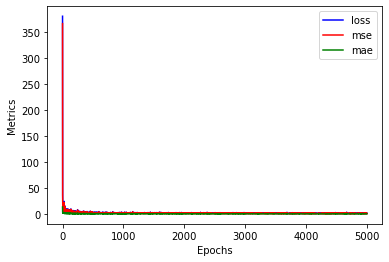

In [98]:
plt.figure()
plt.plot(a.index,a.loss,c='blue',label='loss')
plt.plot(a.index,a.mse, c='r',label='mse')
plt.plot(a.index, a.mean_absolute_error,c='g', label='mae')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.show()

In [99]:
from sklearn.metrics import r2_score
r2_score(y_test,model.predict(X_test))

17/17 [==============================] - 0s 2ms/step


0.9866365044084697

In [100]:
r2_score(y_train,model.predict(X_train))

39/39 [==============================] - 0s 2ms/step


0.9898836258685247

In [102]:
mean_squared_error(y_test,model.predict(X_test))

17/17 [==============================] - 0s 2ms/step


1.8471920839223757

In [103]:
mean_squared_error(y_train,model.predict(X_train))

39/39 [==============================] - 0s 3ms/step


1.3615480775901556

In [109]:
model.save("EXP_IFT_Model_no_phase.h5")

In [105]:
ann=pd.DataFrame(y_test)
pred=pd.DataFrame(model.predict(X_test),columns=['IFT ANN model'])

17/17 [==============================] - 0s 3ms/step


In [106]:
ann.index=pred.index

In [107]:
ann=pd.concat([ann,pred],axis=1)

In [108]:
ann.to_csv('EXP_ITF_without_phase_new_1.csv')